In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import time

## Swing States

- Pennsylvania
- Michigan
- Wisconsin
- Georgia
- Arizona
- North Carolina
- Nevada

In [2]:
# Load the most recent 538 Data

df = pd.read_csv("https://projects.fivethirtyeight.com/polls/data/president_polls.csv")
pd.set_option("display.max_columns", None)
df.head()



,poll_id,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,numeric_grade,pollscore,methodology,transparency_score,state,start_date,end_date,sponsor_candidate_id,sponsor_candidate,sponsor_candidate_party,endorsed_candidate_id,endorsed_candidate_name,endorsed_candidate_party,question_id,sample_size,population,subpopulation,population_full,tracking,created_at,notes,url,source,internal,partisan,race_id,cycle,office_type,seat_number,seat_name,election_date,stage,nationwide_batch,ranked_choice_reallocated,ranked_choice_round,party,answer,candidate_id,candidate_name,pct
0,86717,568,YouGov,352,Economist,YouGov,391,YouGov,2.9,-1.1,Online Panel,9.0,NaN,4/21/24,4/23/24,NaN,NaN,NaN,NaN,NaN,NaN,197224,1470.0,rv,NaN,rv,NaN,4/24/24 11:10,NaN,https://d3nkl3psvxxpe9.cloudfront.net/document...,NaN,NaN,NaN,8914,2024,U.S. President,0,NaN,11/5/24,general,False,False,NaN,DEM,Biden,19368,Joe Biden,43.0
1,86717,568,YouGov,352,Economist,YouGov,391,YouGov,2.9,-1.1,Online Panel,9.0,NaN,4/21/24,4/23/24,NaN,NaN,NaN,NaN,NaN,NaN,197224,1470.0,rv,NaN,rv,NaN,4/24/24 11:10,NaN,https://d3nkl3psvxxpe9.cloudfront.net/document...,NaN,NaN,NaN,8914,2024,U.S. President,0,NaN,11/5/24,general,False,False,NaN,REP,Trump,16651,Donald Trump,43.0
2,86717,568,YouGov,352,Economist,YouGov,391,YouGov,2.9,-1.1,Online Panel,9.0,NaN,4/21/24,4/23/24,NaN,NaN,NaN,NaN,NaN,NaN,197224,1470.0,rv,NaN,rv,NaN,4/24/24 11:10,NaN,https://d3nkl3psvxxpe9.cloudfront.net/document...,NaN,NaN,NaN,8914,2024,U.S. President,0,NaN,11/5/24,general,False,False,NaN,IND,Kennedy,31042,Robert F. Kennedy,3.0
3,86717,568,YouGov,352,Economist,YouGov,391,YouGov,2.9,-1.1,Online Panel,9.0,NaN,4/21/24,4/23/24,NaN,NaN,NaN,NaN,NaN,NaN,197224,1470.0,rv,NaN,rv,NaN,4/24/24 11:10,NaN,https://d3nkl3psvxxpe9.cloudfront.net/document...,NaN,NaN,NaN,8914,2024,U.S. President,0,NaN,11/5/24,general,False,False,NaN,IND,West,31097,Cornel West,0.0
4,86717,568,YouGov,352,Economist,YouGov,391,YouGov,2.9,-1.1,Online Panel,9.0,NaN,4/21/24,4/23/24,NaN,NaN,NaN,NaN,NaN,NaN,197224,1470.0,rv,NaN,rv,NaN,4/24/24 11:10,NaN,https://d3nkl3psvxxpe9.cloudfront.net/document...,NaN,NaN,NaN,8914,2024,U.S. President,0,NaN,11/5/24,general,False,False,NaN,GRE,Stein,31116,Jill Stein,0.0


In [3]:
#Define a function to grab the data by state


def get_state_data(state,df):
    state_data = df[df['state'] == state]
    return state_data.copy()

pa = get_state_data('Pennsylvania',df)
mi = get_state_data('Michigan',df)
wi = get_state_data('Wisconsin',df)
ga = get_state_data('Georgia',df)
az = get_state_data('Arizona',df)
nc = get_state_data('North Carolina',df)
nv = get_state_data('Nevada',df)
states = [pa,mi,wi,ga,az,nc,nv]

pa.head()

,poll_id,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,numeric_grade,pollscore,methodology,transparency_score,state,start_date,end_date,sponsor_candidate_id,sponsor_candidate,sponsor_candidate_party,endorsed_candidate_id,endorsed_candidate_name,endorsed_candidate_party,question_id,sample_size,population,subpopulation,population_full,tracking,created_at,notes,url,source,internal,partisan,race_id,cycle,office_type,seat_number,seat_name,election_date,stage,nationwide_batch,ranked_choice_reallocated,ranked_choice_round,party,answer,candidate_id,candidate_name,pct
16,86734,1714,Kaplan Strategies,NaN,NaN,Kaplan Strategies,124,Kaplan Strategies,2.0,-0.9,Online Panel/Text-to-Web,4.5,Pennsylvania,4/20/24,4/21/24,NaN,NaN,NaN,NaN,NaN,NaN,197394,802.0,rv,NaN,rv,NaN,4/26/24 09:30,NaN,https://kaplanstrategies.com/2024/04/26/1450/,NaN,NaN,NaN,8872,2024,U.S. President,0,NaN,11/5/24,general,False,False,NaN,DEM,Biden,19368,Joe Biden,41.0
17,86734,1714,Kaplan Strategies,NaN,NaN,Kaplan Strategies,124,Kaplan Strategies,2.0,-0.9,Online Panel/Text-to-Web,4.5,Pennsylvania,4/20/24,4/21/24,NaN,NaN,NaN,NaN,NaN,NaN,197394,802.0,rv,NaN,rv,NaN,4/26/24 09:30,NaN,https://kaplanstrategies.com/2024/04/26/1450/,NaN,NaN,NaN,8872,2024,U.S. President,0,NaN,11/5/24,general,False,False,NaN,REP,Trump,16651,Donald Trump,46.0
96,86690,1597,Beacon/Shaw,149,FOX News,Beacon Research/Shaw & Company Research,103,Beacon Research/Shaw & Co. Research,2.8,-1.1,Live Phone/Text-to-Web,6.0,Pennsylvania,4/11/24,4/16/24,NaN,NaN,NaN,NaN,NaN,NaN,196934,1141.0,rv,NaN,rv,NaN,4/18/24 20:54,NaN,https://www.foxnews.com/official-polls/fox-new...,NaN,NaN,NaN,8872,2024,U.S. President,0,NaN,11/5/24,general,False,False,NaN,DEM,Biden,19368,Joe Biden,42.0
97,86690,1597,Beacon/Shaw,149,FOX News,Beacon Research/Shaw & Company Research,103,Beacon Research/Shaw & Co. Research,2.8,-1.1,Live Phone/Text-to-Web,6.0,Pennsylvania,4/11/24,4/16/24,NaN,NaN,NaN,NaN,NaN,NaN,196934,1141.0,rv,NaN,rv,NaN,4/18/24 20:54,NaN,https://www.foxnews.com/official-polls/fox-new...,NaN,NaN,NaN,8872,2024,U.S. President,0,NaN,11/5/24,general,False,False,NaN,REP,Trump,16651,Donald Trump,44.0
98,86690,1597,Beacon/Shaw,149,FOX News,Beacon Research/Shaw & Company Research,103,Beacon Research/Shaw & Co. Research,2.8,-1.1,Live Phone/Text-to-Web,6.0,Pennsylvania,4/11/24,4/16/24,NaN,NaN,NaN,NaN,NaN,NaN,196934,1141.0,rv,NaN,rv,NaN,4/18/24 20:54,NaN,https://www.foxnews.com/official-polls/fox-new...,NaN,NaN,NaN,8872,2024,U.S. President,0,NaN,11/5/24,general,False,False,NaN,IND,Kennedy,31042,Robert F. Kennedy,8.0


In [4]:
def get_candidate_data(candidate,df):
    candidate_data = df[df['candidate_name'] == candidate]
    return candidate_data.copy()

biden_states = [get_candidate_data('Joe Biden',state) for state in states]
trump_states = [get_candidate_data('Donald Trump',state) for state in states]
kennedy_states = [get_candidate_data('Robert F. Kennedy',state) for state in states]

biden_pa = biden_states[0]
trump_pa = trump_states[0]
kennedy_pa = kennedy_states[0]


In [15]:
def time_series(df, name, state, x='start_date', y='pct'):
    df = df.copy()
    df[x] = pd.to_datetime(df[x],format='%m/%d/%y').to_numpy()
    fig = px.scatter(df, x=x, y=y, title=f'{name} Polling in {state}', labels={x:'Date', y:'Percentage'}, template='plotly_dark')
    #Add least squares line
    m, b = np.polyfit(df.index, df[y], 1)
    fig.add_scatter(x=df[x], y=m*df.index+b, mode='lines', name='Least Squares')
    #Add traceline 
    fig.update_traces(hoverinfo='text+name', mode='lines+markers',)
    fig.update_layout(hovermode="x unified")
    #Add horizontal line at 50%
    fig.add_hline(y=50, line_dash="dot", line_color="red", annotation_text="50%")
    return fig.show()
#Make time series plot for Biden in PA
time_series(biden_pa, 'Joe Biden', 'Pennsylvania')
time_series(trump_pa, 'Donald Trump', 'Pennsylvania')
time_series(kennedy_pa, 'Robert F. Kennedy', 'Pennsylvania')

In [6]:
#Make a biden time series plot for all states
# for i in range(len(states)):
#     time_series(biden_states[i], 'Joe Biden', states[i]['state'].iloc[0])

# #Make a trump time series plot for all states
# for i in range(len(states)):
#     time_series(trump_states[i], 'Donald Trump', states[i]['state'].iloc[0])

# #Make a kennedy time series plot for all states
# for i in range(len(states)):
#     time_series(kennedy_states[i], 'Robert F. Kennedy', states[i]['state'].iloc[0])

In [7]:
#Zoom in on Michigan for Biden
time_series(biden_states[1], 'Joe Biden', states[1]['state'].iloc[0])

## How has the war in Gaza impacted Joe Biden's polling for Michigan?

- Michigan has a large Muslim population, which makes a significant proportion of Joe Biden's base.

## Did RFK Jr's Superbowl Ad Change anything?

In [8]:
#Look at google trends data

from pytrends.request import TrendReq

time.sleep(30)

pytrends = TrendReq(hl='en-US', tz=360)

kw_list = ['Robert F. Kennedy', 'Joe Biden', 'Donald Trump']

pytrends.build_payload(kw_list, cat=0, timeframe='today 12-m', geo='', gprop='')

interest_over_time_df = pytrends.interest_over_time()
interest_over_time_df.head()

,Robert F. Kennedy,Joe Biden,Donald Trump,isPartial
date,,,,
2023-04-23,1,36,24,False
2023-04-30,0,22,20,False
2023-05-07,0,20,35,False
2023-05-14,0,18,18,False
2023-05-21,0,15,17,False


<Axes: xlabel='date'>

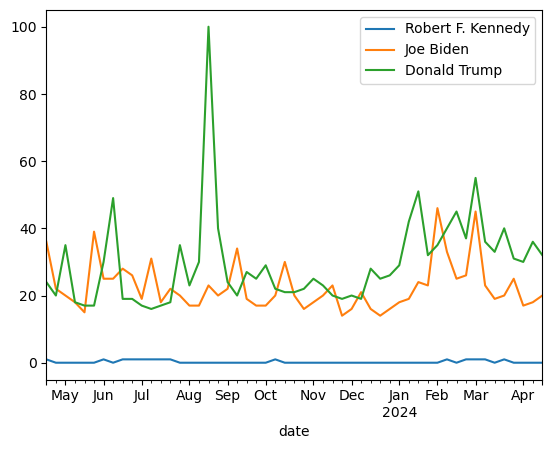

In [9]:
interest_over_time_df.plot()

## How did the report on Biden's memory change anything?

In [10]:
#Again we can look at google trends to see if there was an uptick in search for Joe Biden's age and the special counsel report


time.sleep(60)

pytrends = TrendReq(hl='en-US', tz=360)

kw_list = ['Joe Biden age']

pytrends.build_payload(kw_list, cat=0, timeframe='today 12-m', geo='', gprop='')

biden_over_time_df = pytrends.interest_over_time()

data  = pytrends.related_queries()




<Axes: xlabel='date'>

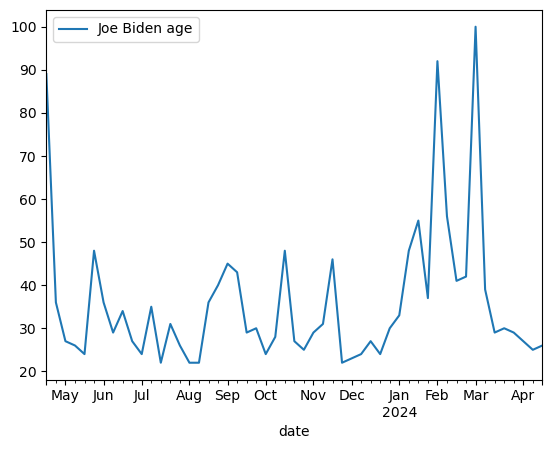

In [11]:
biden_over_time_df.plot()

In [12]:
print(data["Joe Biden age"]["top"])
data["Joe Biden age"]["rising"]

                  query  value
0             age trump    100
1          donald trump     58
2       joe biden young      7
3  dianne feinstein age      2
4       donal trump age      1


,query,value
0,donal trump age,140
1,dianne feinstein age,100
2,donald trump,80
3,age trump,70
